# Lab 8: Systems of ODEs and Boundary Value Problems

### Topics

- **Mathematics:** methods for solving systems of first-order ODEs; converting higher-order ODEs to systems of first-order ODEs; converting boundary value problems to systems of linear equation; effect of changing step size.
- **Python:** adapting programs for a solving single ODE so they can solve systems of ODEs; plotting solutions to systems of ODEs; setting up tridiagonal matrices; solving systems of linear equations.

In [1]:
import math #math.ceil returns int, but numpy.ceil returns float
import numpy as np
np.set_printoptions(edgeitems=5, linewidth=130, precision=2)

from scipy import integrate

%matplotlib widget
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

## Part I: Systems of ODEs

In the previous lab, you used Euler's method to solve a single first-order ODE.  In this lab, you will adapt this method to solve **systems of several ODEs**.  The only real difference is that some of the variables are now vectors instead of scalars, and the output variable `y`, which contains the function values at all intermediate points, will be a matrix instead of a vector – but this doesn't matter to Python.

## Question 1

Consider a simple pendulum of length $l$ metres which pivots about the point $P$.  We assume that friction and air resistance can be neglected.  If $\theta$ is the angle (in radians) which the rod of the pendulum makes with the vertical at time $t$, then the motion of the pendulum can be described as a second-order ODE:
$$
  \frac{\mathrm{d}^2\theta}{\mathrm{d}t^2}+\frac{g}{l}\sin\theta=0,\qquad\qquad(1)
$$
where $g=9.81\mathrm{ms}^{-2}$ is acceleration due to gravity.  Notice that this equation is valid even if the pendulum is allowed to perform complete revolutions (as in some of the questions below).
1. On paper, rewrite equation (1) as a system of two first-order ODEs involving two dependent variables $y_1=\theta$ and $y_2=\mathrm{d}\theta/\mathrm{d} t$:
    \begin{align*}
      \frac{\mathrm{d}y_1}{\mathrm{d}t} &= \dots \\
      \frac{\mathrm{d}y_2}{\mathrm{d}t} &= \dots
    \end{align*}
    Rewrite this system as a vector-valued ODE with just a single dependent variable, the column vector $\underline{\mathbf{y}}$.

$$
      \frac{\mathrm{d}\underline{\mathbf{y}}}{\mathrm{d}t}
        = \begin{bmatrix}
            \dots\\
            \dots
          \end{bmatrix},
      \qquad {\rm where} \qquad
      \underline{\mathbf{y}}
        = \begin{bmatrix}
            y_1 \\
            y_2
          \end{bmatrix}.
$$

2. Assume the pendulum has length $l = 0.1\mathrm{m}$.  Write a short function `fun` which evaluates the right-hand side of the ODE $\mathrm{d} \underline{\mathbf{y}}/\mathrm{d} t = \underline{\mathbf{f}}(t,\underline{\mathbf{y}})$ that you obtained in part (1).  The input variable $\underline{\mathbf{y}}$ and the output variable $\underline{\mathbf{f}}$ should both be 1D vectors.

3. `scipy.integrate.solve_ivp` works with systems of first order ODEs.  If you store the return value in `sol`, `sol.y` will have the steps as its columns; `sol.y[0]` will be $\theta$ and `sol.y[1]` will be $\frac{\mathrm{d}\theta}{\mathrm{d}t}$.  Use `solve_ivp` to solve the system of ODEs with initial conditions $\theta(0) = \frac{\pi}{3}$, $\left.\frac{\mathrm{d}\theta}{\mathrm{d}t}\right|_{t=0} = 0$, up to $t = 5\mathrm{s}$.  Use the parameter `max_step=.01` to get small steps good for graphing.  Plot your solution for $\theta$.  Does it make sense?

In [ ]:
type your code here

4. The 1-dimensional `euler` function from Lab 7 is below, as `euler_1d`.  Make a copy of it named `euler` modified so it works with systems of DEs.  `y` should have the state vectors in its `n` *columns*, and the number of rows should match the length of `y0`.

In [ ]:
def euler_1d(fun, t_span, y0, h):
    """Solves a single ordinary differential equation using Euler's method.
    
    Args:
        fun (callable): computes the derivative of y at t using fun(t, y)
        y0 (np.ndarray): initial condition on y (can be a vector)
        t_span (tuple): interval of integration (t0, tf)
        h (float): step size
    Returns:
        t (np.ndarray): array containing the value of t at each time point in [t0, tf]
        y (np.ndarray): array containing the value of y at each time point in [t0, tf]
    """

    n = math.ceil((t_span[1] - t_span[0]) / h) + 1
    t = np.linspace(t_span[0], t_span[1], n)
    y = np.zeros(len(t))

    y[0] = y0
    for i in range(0, len(t) - 1):
        t[i + 1] = t[i] + h
        y[i + 1] = y[i] + h * fun(t[i], y[i])
    
    return t, y

In [ ]:
type your code here

5. Solve the pendulum system again using `euler` with a time step of $h = 0.01$.  Plot your solution.  Does it make sense?

In [ ]:
type your code here

6. Now make a copy of `euler` and rename it `heun`.  Modify this function so that it solves the ODE by the vector version of Heun's method:
    \begin{align*}
      \underline{\mathbf{k}}_1 &= \underline{\mathbf{f}}(t^{(i)},\underline{\mathbf{y}}^{(i)}) \\
      \underline{\mathbf{k}}_2 &= \underline{\mathbf{f}}(t^{(i)}+h,\underline{\mathbf{y}}^{(i)} +h\underline{\mathbf{k}}_1) \\
      \underline{\mathbf{y}}^{(i+1)} &= \underline{\mathbf{y}}^{(i)} + \frac{h}{2}\left( {\underline{\mathbf{k}}_1}+{\underline{\mathbf{k}}_2} \right)
    \end{align*}
    Use your new function to solve the same problem with the same step size of $h = 0.01\mathrm{s}$.  Plot your solution.  Does it make sense?
    
    **Hint:** The $\underline{\mathbf{y}}$ values for the first three steps should be:
    ```
    array([[ 1.05,  1.04,  1.03],
           [ 0.  , -0.85, -1.69]])
    ```

In [ ]:
type your code here

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 1</h3>

  Plot a graph of $\theta$ against $t$, showing the results from Euler's method, Heun's method and <code>solve_ivp</code> on the same graph.  Can you explain the difference between the different sets of results?
</div>

In [ ]:
type your code here

In [ ]:
def animate_pendulum(t, theta, title=None, l=.1):
    '''Animates a pendulum from angle data at equally spaced points in time.
    Args:
        t (np.ndarray): vector of *equally spaced* time values
        theta (np.ndarray): vector of pendulum angles at the above times
    Returns:
        animation (matplotlib.animation.Animation): object representing the animation
    
    '''
    fig, ax = plt.subplots(figsize=(5, 5))
    dim = 1.3*l
    ax.set(xlim=(-dim, dim), ylim=(-dim, dim))
    if title:
        ax.set_title(title)
    x = l*np.sin(theta)
    y = -l*np.cos(theta)
    line = ax.plot([0, x[0]], [0, y[0]], '-')[0]
    point = ax.plot([x[0]], [y[0]], 'o')[0]
    def animate(frame):
        line.set_data([0, x[frame]], [0, y[frame]])
        point.set_data([x[frame]], [y[frame]])
        return [line, point]
    animation = FuncAnimation(fig, animate, interval=1000*(t[1]-t[0]), frames=len(t), repeat=False, blit=True)
    return animation

7. Some physics: Suppose that you start the pendulum in its resting position $\theta(0)=0$ and give it an initial push (so that $\left.\frac{\mathrm{d}\theta}{\mathrm{d}t}\right|_{t=0}>0$).  How large does $\left.\frac{\mathrm{d}\theta}{\mathrm{d}t}\right|_{t=0}$ have to be for the pendulum to reach the upright position $\theta=\pi$? **Hint:** Think about kinetic and potential energy.  The velocity of the pendulum is given by $v = l\frac{\mathrm{d}\theta}{\mathrm{d}t}$.
8. The function `animate_pendulum` above produces animations of the pendulum from a vector of values of $\theta$ at *equally spaced* points in time.  20 frames per second is a good frame rate, which means time values $0.05\mathrm{s}$ apart, and this is too big for `heun` to be accurate.  One option is to run `heun` with a smaller time step and then use e.g. every 5th step, but it's easier to use `solve_ivp` and tell it the times you want with the argument `t_eval=t`, where `t` is a vector of times you made with `np.arange` or `np.linspace`.
  
    <div class="alert alert-warning">
      <h3 style="margin-top: 0;">Checkpoint 2</h3>
      
      Choose two initial values of $\frac{\mathrm{d}\theta}{\mathrm{d}t}$: one that is slightly smaller than your answer to the above question and one that is slightly larger.  Solve the pendulum problem up to $t=5\mathrm{s}$ (using either your own function <code>heun</code> or <code>solve_ivp</code>) for both these initial conditions.
    
      Use <code>animate_pendulum</code> to visualise the movement of the pendulum for the two initial values of $\frac{\mathrm{d}\theta}{\mathrm{d}t}$ you chose above.      
      
      Do the animations reflect the behaviour you would expect from a (frictionless) physical system?
    </div>
    
    **Bonus:** The Animation object returned by `animate_pendulum` can save as a GIF with `animation.save('pendulum.gif', dpi=100, writer=PillowWriter(fps=20))`.

In [ ]:
type your code here

In [ ]:
type your code here

## Part II: Boundary Value problems

## Question 2: Tridiagonal matrices

Boundary value problems often result in a system of linear equations of the form $A\underline{\mathbf{y}} = \underline{\mathbf{b}}$ where $A$ is a **tridiagonal** $(n+1)\times(n+1)$ matrix.  Suppose $h=1/n$ and

$$
  A = \begin{bmatrix}
        1 &&&&& \\
        -\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} \\
        & -\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} \\
        && \ddots & \ddots & \ddots \\
        &&& -\frac{1}{h^2} & \frac{2}{h^2} & -\frac{1}{h^2} \\
        &&&&& 1 \\
      \end{bmatrix},
  \qquad
  \underline{\mathbf{b}} = \begin{bmatrix} 4 \\ 0 \\ 0 \\ \vdots \\ 0 \\ 2 \end{bmatrix}
$$

Write function that sets up $A$ and $b$ for a given number of steps $n$.  The easiest way to do this is to define three column vectors containing the entries of the main diagonal ($n+1$ elements), subdiagonal ($n$ elements) and superdiagonal ($n$ elements).  The `np.ones` and `np.hstack` functions are useful here:
```
main = np.hstack([1., (2./h**2)*np.ones(n-1), 1.])
sub = ...
sup = ...
```
These vectors can be combined into a tridiagonal matrix using the `diag` function (run `help(np.diag)` for help with this part):
```
A = diag(main) + ...
```

<div class="alert alert-warning">
  <h3 style="margin-top: 0;">Checkpoint 3</h3>

  Use your function to generate the matrix $A$ for $n=10$.
</div>

In [ ]:
type your code here

## Question 3: A steady-state heat distribution problem

The diagram shows a thin rod, of length $L$ metres, whose ends are kept at fixed temperatures $a$ and $b$ where $a>b$.  The arrows represent heat flow.

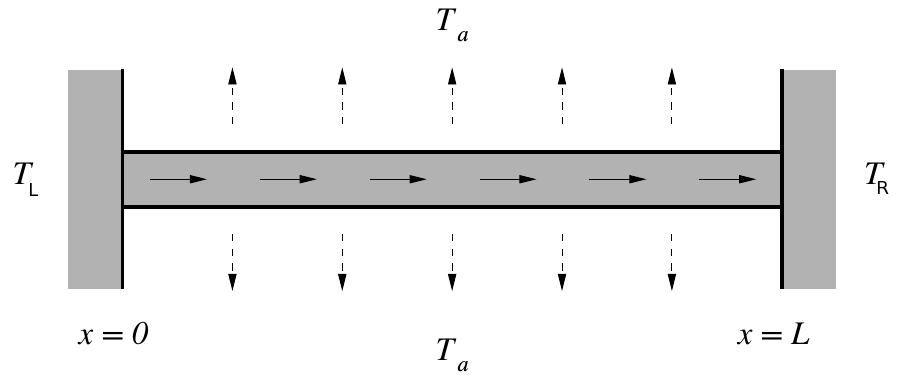

In the steady-state situation the temperature $T$ is a function of $x$, the distance along the rod, but not a function of time.  If the rod is not insulated along its length, then $T$ is determined by the
boundary value problem

$$
  -\frac{\mathrm{d}^2 T}{\mathrm{d} x^2} + c(T - T_a) = 0, \qquad T(0) = a, \qquad T(L) = b
$$

where $c$ is a heat transfer coefficient for heat loss to the surroundings, and $T_a$ is the temperature of those surroundings.

As in the lectures, we divide the rod into $n$ intervals of length $h$.  We replace the derivative term by a central difference approximation, and evaluate the resulting equation at each grid point.  This gives a series of linear equations

$$
  \frac{-T_{i-1} \ + \ 2T_i \ - \ T_{i+1}}{h^2} \ + \ c\,(T_i \ - \ T_a) \ = \ 0 \qquad\qquad(2)
$$

for $i=1, \ldots, n-1$, a total of $n-1$ equations in the $n-1$ unknowns $T_1,\ldots,T_{n-1}$.  We also have the two boundary conditions $T_0=a$ and $T_n=b$.
1. Write down **on paper** the matrix $A$ and vector $\underline{\mathbf{b}}$ for the system of $n+1$ equations in $n+1$ variables ($T_0,T_1,\ldots,T_n$).  **Hint:** the first and last rows of the system are just the two boundary conditions, the other rows and given by putting $i=1,2,\ldots$ into Eq. (2).  The coefficient matrix $A$ should be a tridiagonal $(n+1)\times(n+1)$ matrix.
2. For this lab session use the following values of the parameters: $L = 10\mathrm{m}$, $T_a  = 1^\circ\mathrm{C}$, $a = 200^\circ\mathrm{C}$, $b = 40^\circ\mathrm{C}$, $c = 0.1\mathrm{m}^{-2}$.  Write a function that solves the problem to find the temperature values along the rod:
    
    ```
    def rod(n):
        ...
        return x, T
    ```
    
    **Hints:** It may help to think in terms of the following steps:
    <ol type="a">
      <li>Calculate the step size $h$ in terms of $L$ and $n$.</li>
      <li>Set up a vector <code>x</code> of the appropriate size.</li>
      <li>Assemble the tridiagonal coefficient matrix $A$ and the right-hand side vector $\underline{\mathbf{b}}$ (you should be able to adapt your code from Question 2).</li>
      <li>Solve for the temperatures at the grid points using <code>np.linalg.solve</code>.</li>
    </ol>
3. Use your function with $n = 5$ steps to find approximate values for the temperatures at $x = 0,\, 2,\, \dots,\, 10$.
    <div class="alert alert-warning">
      <h3 style="margin-top: 0;">Checkpoint 4</h3>

      Plot your $T$ values as a function of the distance $x$ along the rod.  Check that your answers satisfy the boundary conditions.  Do your answers look plausible from a physical point of view?
    </div>

In [ ]:
type your code here

4. Repeat the process with double the number of steps, and keep doubling until the values of $T$ for $x = 0,\, 2,\, \dots,\, 10$ change by less than $0.01$.  Plot your final $T$ values and your initial approximations from the previous checkpoint against $x$ on a single graph.  What happens to the solution as the step size is decreased? Where is the coolest point on the rod?

In [ ]:
type your code here